### Download pretrainedModels from link:
[Pretrained Models](https://iith-my.sharepoint.com/:f:/g/personal/co21btech11004_iith_ac_in/EiKuBfu8qvlKiWGDwPKSBkgBJW6jVpuKbjhJ0CVPd0BUzQ?e=dphHh3)

In [1]:
! git clone https://github.com/AndrewAtanov/simclr-pytorch.git

Cloning into 'simclr-pytorch'...
remote: Enumerating objects: 93, done.
remote: Counting objects: 100% (39/39), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 93 (delta 22), reused 17 (delta 14), pack-reused 54 (from 1)
Receiving objects: 100% (93/93), 1.81 MiB | 9.76 MiB/s, done.
Resolving deltas: 100% (37/37), done.


In [2]:
import sys
sys.path.append('./simclr-pytorch')

In [3]:
import torch
import models
from utils import utils
import matplotlib.pyplot as plt
from PIL import Image
from torchvision import transforms

In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [5]:
# load linear model chekpoint
ckpt = torch.load('./pretrained_models/resnet50_imagenet_bs2k_epochs600_linear.pth.tar', map_location=device)
# set path to the corresponding encoder checkpoint
ckpt['hparams'].encoder_ckpt = './pretrained_models/resnet50_imagenet_bs2k_epochs600.pth.tar'

model = models.ssl.SSLEval.load(ckpt, device=device)
model.encoder.eval()
model.eval()

/tmp/ipykernel_754404/1157148363.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load('./pretrained_models/resnet50_imagenet_bs2k_epochs600_linear.pth.tar',

IMAGENET_PATH = /home/aashukha/imagenet/raw-data/


/export/home/darpan/work_dir/cvProject/src/simclrPre/simclr-pytorch/models/ssl.py:304: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(hparams.encoder_ckpt, 

IMAGENET_PATH = /home/aashukha/imagenet/raw-data/
** Using avgpool **
======> Encoder: output dim 2048 | 25.557M parameters


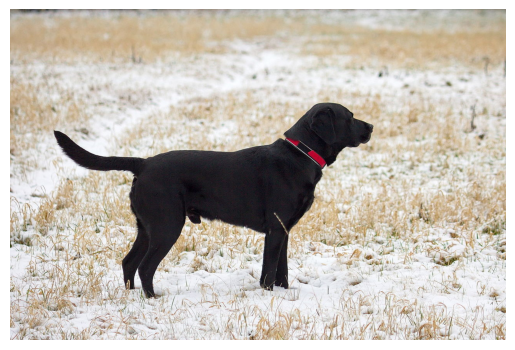

In [6]:
img_path = '/export/home/darpan/work_dir/cvProject/src/images/dog.jpg'
# load image


transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

dogImg = Image.open(img_path)
# cropt the image to 224x224
img = dogImg.resize((224, 224))

# plot the image
plt.imshow(dogImg)
plt.axis('off')
plt.show()

In [7]:
img = transform(dogImg)
img = img.unsqueeze(0)  # add batch dimension
img = img.to(device)

# get the features
with torch.no_grad():
    features = model.encoder(img)
    features = features.cpu().numpy()
    print(features.shape)

(1, 128)


In [15]:
# Experiment use Trained simCLR model to Perform TSNE of Embeddings for Test Cifar 10 Dataset

# Import necessary libraries
import os
import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE


In [16]:
# Define constants
BATCH_SIZE = 128
NUM_WORKERS = 0
NUM_CLASSES = 10
testset = torchvision.datasets.CIFAR10(
    root='./data',
    train=False,
    download=True,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ])
)

testloader = torch.utils.data.DataLoader(
    testset,
    batch_size=BATCH_SIZE,
    shuffle=False,
    num_workers=NUM_WORKERS
)

100%|██████████| 170M/170M [00:16<00:00, 10.2MB/s] 


Extracting ./data/cifar-10-python.tar.gz to ./data


In [17]:
# generate embeddings
def get_embeddings(model, dataloader):
    embeddings = []
    labels = []
    with torch.no_grad():
        for data in dataloader:
            inputs, targets = data
            inputs = inputs.to('cuda')
            outputs = model.encoder(inputs)
            embeddings.append(outputs.cpu().numpy())
            labels.append(targets.numpy())
    return np.concatenate(embeddings), np.concatenate(labels)


# Plot t-SNE
def plot_tsne(embeddings_2d, labels, model_name):
    plt.figure(figsize=(10, 10))
    scatter = plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=labels, cmap='jet', s=5)
    plt.colorbar(scatter)
    plt.title(f't-SNE visualization of CIFAR-10 embeddings using {model_name}')
    plt.xlabel('t-SNE component 1')
    plt.ylabel('t-SNE component 2')
    plt.show()


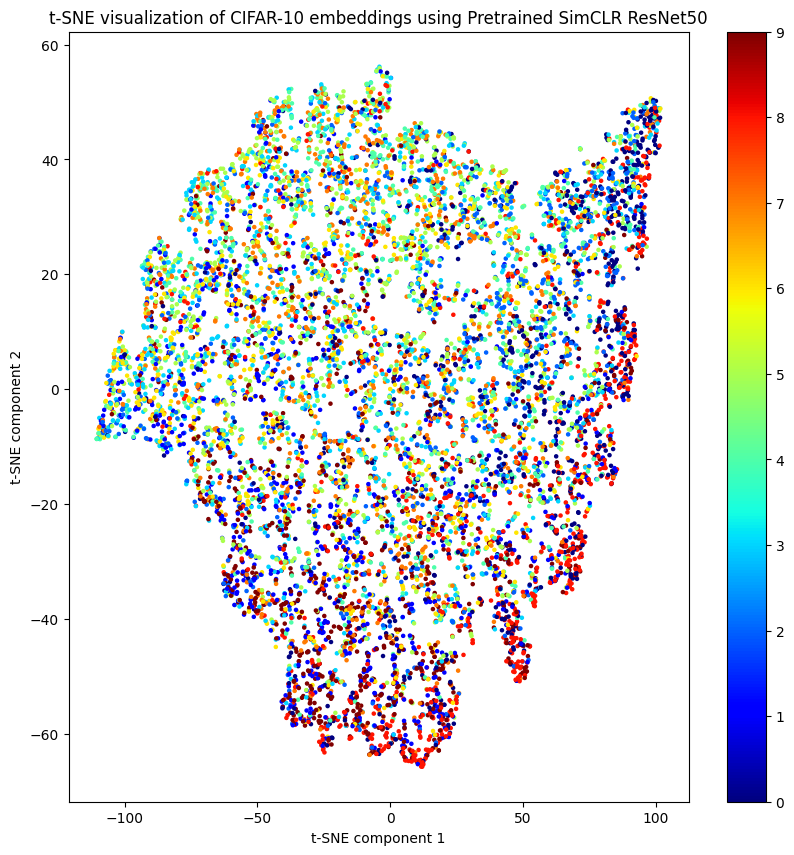

In [19]:
# Get embeddings and labels
embeddings, labels = get_embeddings(model, testloader)

# Perform t-SNE
tsne = TSNE(n_components=2, random_state=0)
embeddings_2d = tsne.fit_transform(embeddings)
plot_tsne(embeddings_2d, labels, 'Pretrained SimCLR ResNet50')